In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F


In [2]:

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5,), (0.5,))])

# 데이터셋 다운로드
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
# 데이터 로딩
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)

# 테스트 데이터셋
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                        download=True, transform=transform)
# 테스트 데이터 로딩
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# 각 클래스명 
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
            'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Using downloaded and verified file: ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw

Using downloaded and verified file: ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



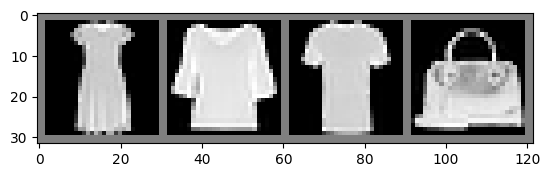

'Dress Shirt T-shirt/top Bag'

In [3]:
# 이미지를 보여주기 위한 함수
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# label 출력
' '.join('%s' % classes[labels[j]] for j in range(4))

In [4]:
# CNN 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 모델 훈련
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 변화도(Gradient) 0
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.191
[1,  4000] loss: 0.643
[1,  6000] loss: 0.543
[1,  8000] loss: 0.514
[1, 10000] loss: 0.475
[1, 12000] loss: 0.442
[1, 14000] loss: 0.433
[2,  2000] loss: 0.397
[2,  4000] loss: 0.376
[2,  6000] loss: 0.371
[2,  8000] loss: 0.373
[2, 10000] loss: 0.354
[2, 12000] loss: 0.371
[2, 14000] loss: 0.333
Finished Training


Accuracy of the network on the 10000 test images: 86 %
Accuracy of T-shirt/top : 81 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 85 %
Accuracy of Dress : 78 %
Accuracy of  Coat : 83 %
Accuracy of Sandal : 94 %
Accuracy of Shirt : 62 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 93 %
Accuracy of Ankle boot : 94 %


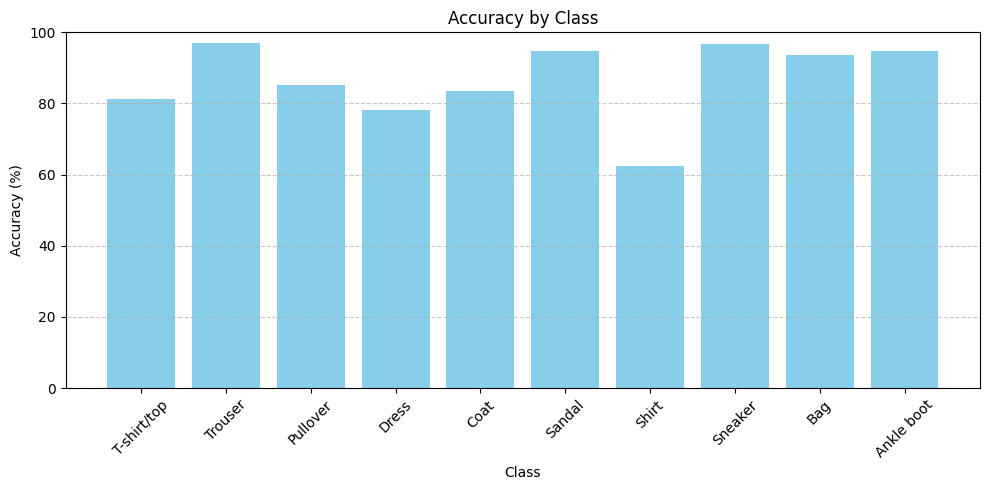

In [6]:
correct = 0
total = 0

# 모든 데이터 평가
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# 클래스별 정확도 확인
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# 클래스별 정확도 계산
class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(10)]

# 클래스별 정확도 시각화
plt.figure(figsize=(10, 5))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy by Class')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # y축 범위를 0에서 100으로 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()